In [1]:
import os

import cv2
import matplotlib.pyplot as plt
from src.models.AENet import Predictor

IMG_SIZE = 224

2024-08-29 23:52:23.931716: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-29 23:52:23.940517: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-29 23:52:23.949946: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-29 23:52:23.952795: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-29 23:52:23.960439: I tensorflow/core/platform/cpu_feature_guar

In [2]:
def show_images(live_images, spoof_images):
    number_lives = len(live_images)
    number_spoofs = len(spoof_images)
    fig, axs = plt.subplots(2, number_lives, figsize=(number_spoofs * number_lives, number_lives))
    for i in range(number_lives):
        axs[0, i].imshow(cv2.cvtColor(live_images[i], cv2.COLOR_BGR2RGB))
        axs[0, i].set_title("Live")
        axs[0, i].axis("off")
        axs[1, i].imshow(cv2.cvtColor(spoof_images[i], cv2.COLOR_BGR2RGB))
        axs[1, i].set_title("Spoof")
        axs[1, i].axis("off")

In [3]:
predictor = Predictor("../../ckpt/ckpt_iter.pth.tar")

/home/pessoal/Documents/repos/liveness_system/src/models/AENet.py:220: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path)[


In [4]:
base_path = "../../data/celebA-spoof/CelebA_Spoof_/CelebA_Spoof/Data/test/"
live_paths = [
    os.path.join(base_path, "4930/live/520891.png"),
    os.path.join(base_path, "4930/live/511717.png"),
    os.path.join(base_path, "4931/live/499439.png"),
    os.path.join(base_path, "4943/live/549726.png"),
    os.path.join(base_path, "4973/live/494955.png"),
]
spoof_paths = [
    os.path.join(base_path, "4930/spoof/495600.png"),
    os.path.join(base_path, "3613/spoof/541354.png"),
    os.path.join(base_path, "4931/spoof/497474.png"),
    os.path.join(base_path, "4943/spoof/494824.png"),
    os.path.join(base_path, "4973/spoof/502204.png"),
]
bbox_lives = [".".join(path.split(".")[:-1]) + "_BB.txt" for path in live_paths]
bbox_spoofs = [".".join(path.split(".")[:-1]) + "_BB.txt" for path in spoof_paths]

print(live_paths)
print(spoof_paths)
print(bbox_lives)
print(bbox_spoofs)

['../../data/celebA-spoof/CelebA_Spoof_/CelebA_Spoof/Data/test/4930/live/520891.png', '../../data/celebA-spoof/CelebA_Spoof_/CelebA_Spoof/Data/test/4930/live/511717.png', '../../data/celebA-spoof/CelebA_Spoof_/CelebA_Spoof/Data/test/4931/live/499439.png', '../../data/celebA-spoof/CelebA_Spoof_/CelebA_Spoof/Data/test/4943/live/549726.png', '../../data/celebA-spoof/CelebA_Spoof_/CelebA_Spoof/Data/test/4973/live/494955.png']
['../../data/celebA-spoof/CelebA_Spoof_/CelebA_Spoof/Data/test/4930/spoof/495600.png', '../../data/celebA-spoof/CelebA_Spoof_/CelebA_Spoof/Data/test/3613/spoof/541354.png', '../../data/celebA-spoof/CelebA_Spoof_/CelebA_Spoof/Data/test/4931/spoof/497474.png', '../../data/celebA-spoof/CelebA_Spoof_/CelebA_Spoof/Data/test/4943/spoof/494824.png', '../../data/celebA-spoof/CelebA_Spoof_/CelebA_Spoof/Data/test/4973/spoof/502204.png']
['../../data/celebA-spoof/CelebA_Spoof_/CelebA_Spoof/Data/test/4930/live/520891_BB.txt', '../../data/celebA-spoof/CelebA_Spoof_/CelebA_Spoof/Da

(383, 367, 3)
(450, 600, 3)
[52, 43, 95, 124]
[33, 57, 94, 115]


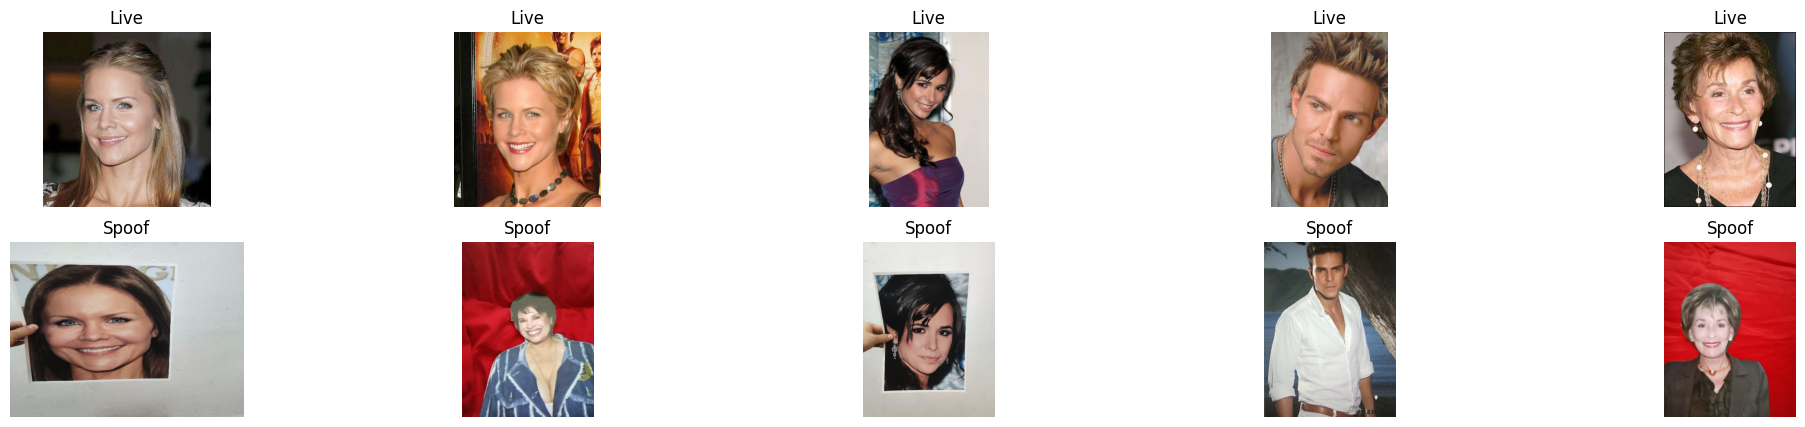

In [5]:
live_images = []
spoof_images = []
bb_lives = []
bb_spoofs = []

for live_path, spoof_path, bb_live, bb_spoof in zip(live_paths, spoof_paths, bbox_lives, bbox_spoofs):
    # Load the images
    live_images.append(cv2.imread(live_path))
    spoof_images.append(cv2.imread(spoof_path))

    # Extract bounding boxes
    with open(bb_live, "r") as file:
        bb_lives.append(list(map(int, file.readlines()[0].split()[:-1])))

    with open(bb_spoof, "r") as file:
        bb_spoofs.append(list(map(int, file.readlines()[0].split()[:-1])))

print(live_images[0].shape)
print(spoof_images[0].shape)
print(bb_lives[0])
print(bb_spoofs[0])

show_images(live_images, spoof_images)

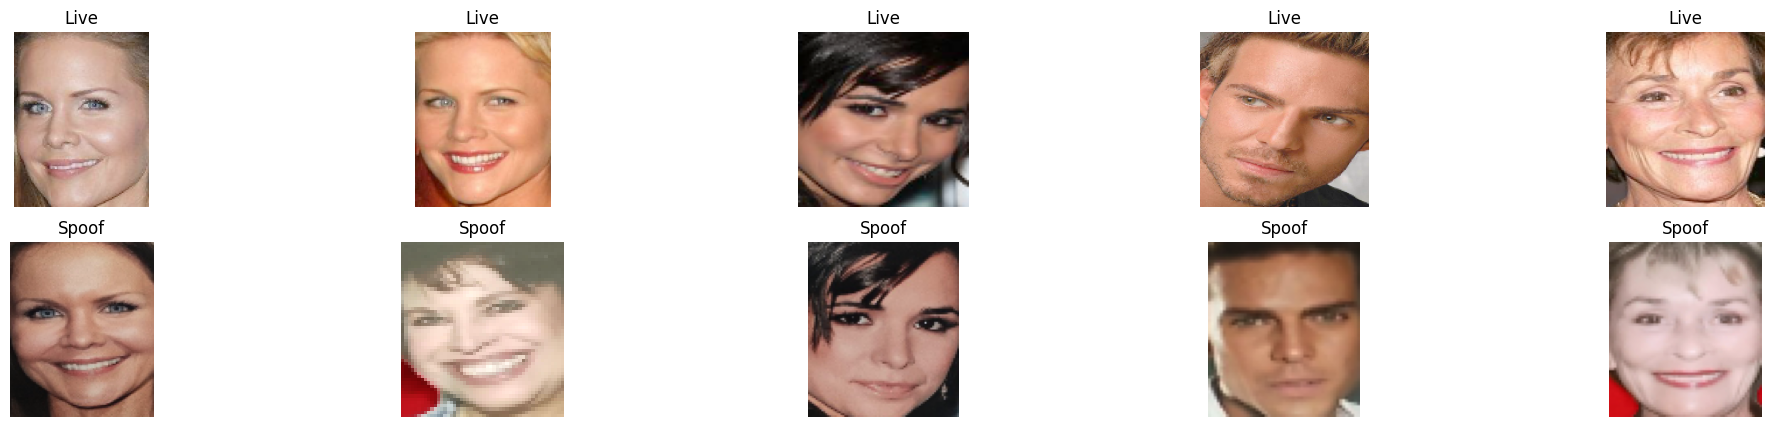

In [6]:
# Crop faces and show cropped images

cropped_live_images = []
cropped_spoof_images = []

for i in range(len(live_images)):
    # Resize images
    cropped_live = cv2.resize(live_images[i], (IMG_SIZE, IMG_SIZE))
    cropped_spoof = cv2.resize(spoof_images[i], (IMG_SIZE, IMG_SIZE))

    # Crop faces and show cropped images
    bbox_live = bb_lives[i]
    bbox_spoof = bb_spoofs[i]

    cropped_live_images.append(cropped_live[
        bbox_live[1] : bbox_live[1] + bbox_live[3],
        bbox_live[0] : bbox_live[0] + bbox_live[2],
    ])
    cropped_spoof_images.append(cropped_spoof[
        bbox_spoof[1] : bbox_spoof[1] + bbox_spoof[3],
        bbox_spoof[0] : bbox_spoof[0] + bbox_spoof[2],
    ])

show_images(cropped_live_images, cropped_spoof_images)

In [7]:
print("Lives (should be close to 0):")
for live in cropped_live_images:
    rst1 = predictor.predict([live])[0]
    print(rst1[1])

print("\nSpoofs (should be close to 1):")
for spoof in cropped_spoof_images:
    rst2 = predictor.predict([spoof])[0]
    print(rst2[1])

Lives (should be close to 0):
0.010308879
0.06538071
0.0007166335
0.11372494
0.002561173

Spoofs (should be close to 1):
0.99999726
0.99999607
0.9999995
0.99999297
0.9999989
